# Problem Set #8
### MACS 30100, Dr. Evans
March 11, 2018  
Mengchen Shi

In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import KFold

from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('./data/strongdrink.txt')

In [3]:
df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.isnull().sum()

cultivar      0
alco          0
malic         0
ash           0
alk           0
magn          0
tot_phen      0
flav          0
nonfl_phen    0
proanth       0
color_int     0
hue           0
OD280rat      0
proline       0
dtype: int64

## Part (a)

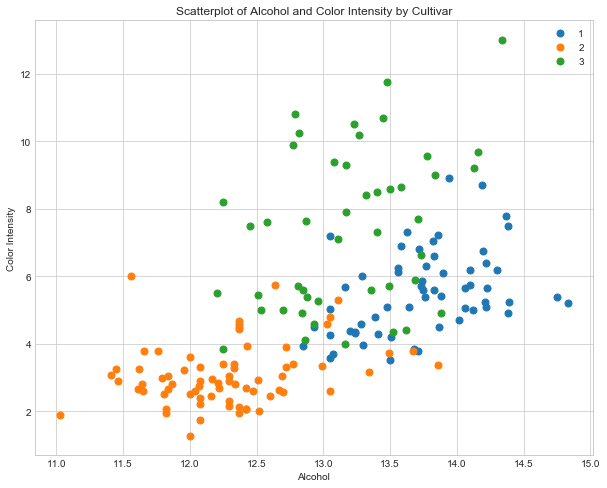

In [5]:
groups = df.groupby('cultivar')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['alco'], group['color_int'], marker='o', linestyle='', ms=7, label=name)
ax.legend()
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('Scatterplot of Alcohol and Color Intensity by Cultivar')
plt.show()

## Part (b)

In [6]:
X = df[['alco','malic','tot_phen','color_int']].values
y= df['cultivar'].values

In [7]:
clf_mlog = KFold(n_splits=4, shuffle=True, random_state=22)
clf_mlog.get_n_splits(X)

4

In [8]:
log_MSE_VEC = np.zeros(4)

for i in range(50):
    c = (i+1)/100
    k_ind = int(0)
    for train_index, test_index in clf_mlog.split(X):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        LogReg = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept = True, C = c)
        LogReg.fit(X_train, y_train)
        y_pred = LogReg.predict(X_test)

        error = y_test != y_pred
        log_MSE_VEC[k_ind]= error.mean()

        k_ind += 1

    print('When C={}:'.format(c), 'MSE={}'.format(log_MSE_VEC.mean()))

When C=0.01: MSE=0.17045454545454547
When C=0.02: MSE=0.13068181818181818
When C=0.03: MSE=0.11931818181818182
When C=0.04: MSE=0.11363636363636363
When C=0.05: MSE=0.11363636363636363
When C=0.06: MSE=0.10227272727272727
When C=0.07: MSE=0.09659090909090909
When C=0.08: MSE=0.09659090909090909
When C=0.09: MSE=0.09090909090909091
When C=0.1: MSE=0.09090909090909091
When C=0.11: MSE=0.09090909090909091
When C=0.12: MSE=0.08522727272727272
When C=0.13: MSE=0.08522727272727272
When C=0.14: MSE=0.08522727272727272
When C=0.15: MSE=0.07954545454545454
When C=0.16: MSE=0.07954545454545454
When C=0.17: MSE=0.07954545454545454
When C=0.18: MSE=0.07954545454545454
When C=0.19: MSE=0.07954545454545454
When C=0.2: MSE=0.07954545454545454
When C=0.21: MSE=0.07954545454545454
When C=0.22: MSE=0.07954545454545454
When C=0.23: MSE=0.07954545454545454
When C=0.24: MSE=0.07954545454545454
When C=0.25: MSE=0.07954545454545454
When C=0.26: MSE=0.07386363636363637
When C=0.27: MSE=0.07386363636363637
Whe

####  The minimized overall MSE is 0.0682 along with C = 0.28 to 0.48. In sklearn penalty is default to be "l2", so we could only play with C.

## Part (c)

In [9]:
MSE_df = pd.DataFrame(columns=['n_estimator','min_sample_leaf','max_dept','MSE'])

In [10]:
for i in range(5):
    for j in range(10):
        for k in range(5):
            n_est = i*20+20
            msl = j*5+5
            md = k+1
            tree = RandomForestClassifier(n_estimators=n_est, max_depth=md, 
                              min_samples_leaf=msl,  bootstrap=True, oob_score=True, random_state=22)
            tree.fit(X, y)
            #print(n_est, msl, md, 1-tree.oob_score_)
            a = pd.DataFrame([n_est, msl, md, 1-tree.oob_score_]).transpose()
            a.columns=(['n_estimator','min_sample_leaf','max_dept','MSE'])
            MSE_df=pd.concat([MSE_df, a])

            

In [11]:
MSE_df.sort_values(['MSE']).head()

,n_estimator,min_sample_leaf,max_dept,MSE
0,80.0,10.0,3.0,0.068182
0,100.0,10.0,3.0,0.068182
0,100.0,10.0,4.0,0.068182
0,100.0,10.0,5.0,0.068182
0,80.0,10.0,5.0,0.079545


#### When max_depth =3, and min_samples_leaft = 10, n_estimator = 80, we achieve the lowest MSE of 0.068182

## Part(d)

In [12]:
MSE_df = pd.DataFrame(columns=['C','gamma','MSE'])

In [13]:
clf_svm = KFold(n_splits=4, shuffle=True, random_state=22)

In [14]:
for i in range(60):
    for j in range(60):
        c = i/20 + 0.05
        g = j/20 +0.05
        k_ind = int(0)
        svm_MSE_VEC = np.zeros(4)

        for train_index, test_index in clf_svm.split(X):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            svc_rbf = SVC(kernel='rbf', C=c, gamma=g)
            svc_rbf.fit(X_train, y_train)
            y_pred_svc = svc_rbf.predict(X_test)
            
            pred_wrong_rbf = y_test != y_pred_svc

            svm_MSE_VEC[k_ind] = pred_wrong_rbf.mean()
            k_ind += 1
            
        a = pd.DataFrame([c, g, svm_MSE_VEC.mean()]).transpose()
        a.columns=(['C','gamma','MSE'])
        MSE_df=pd.concat([MSE_df, a])

In [15]:
MSE_df.sort_values(['MSE']).head()

,C,gamma,MSE
0,1.00,1.70,0.045455
0,0.95,1.70,0.045455
0,0.95,1.65,0.045455
0,1.00,2.25,0.051136
0,1.25,1.70,0.051136


#### When C=1.00, gamma=1.70, we achieve the lowest MSE of 0.045455. Actually, when C is in (0.95,1.00) and gamma in (1.65,1.70), MSE is 0.045455.

## Part(e)

In [16]:
clf_mlp = KFold(n_splits=4, shuffle=True, random_state=22)

In [17]:
activ = np.array(['identity', 'logistic', 'tanh', 'relu'])

In [18]:
MSE_df = pd.DataFrame(columns=['activation','hidden layer sizes', 'alpha','MSE'])

In [19]:
for act in activ:
    for i in range(8):
        for j in range(10):
            h = 50 * (i + 1)
            al = j/10 + 0.05
            k_ind = int(0)
            mlp_MSE_VEC = np.zeros(4)
            for train_index, test_index in clf_mlp.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                mlp = MLPClassifier(activation=act, solver='lbfgs',
                                    alpha=al, random_state=25,
                                    hidden_layer_sizes = h)
                mlp.fit(X_train, y_train)
                y_pred = mlp.predict(X_test)
                error = y_test != y_pred
                mlp_MSE_VEC[k_ind] = error.mean()
                k_ind += 1
                
            a = pd.DataFrame([act, h, al, mlp_MSE_VEC.mean()]).transpose()
            a.columns=(['activation','hidden layer sizes', 'alpha','MSE'])
            MSE_df=pd.concat([MSE_df, a])     

            

In [20]:
MSE_df.sort_values(['MSE']).head()

,activation,hidden layer sizes,alpha,MSE
0,relu,150,0.65,0.0340909
0,relu,200,0.45,0.0397727
0,relu,100,0.45,0.0397727
0,relu,50,0.75,0.0397727
0,relu,250,0.15,0.0397727


#### We get the lowest MSE(0.0340909) when activation is 'relu', hidden layer sizes=150 and alpha=0.65.

## Part(f)

#### Comparing the lowest MSE of the four models, the best model is Neural Net (activation = 'relu', alpha = 0.65 and hidden_layer_sizes = 150) with lowest MSE (0.034091).